In [2]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request

In [37]:
density = pd.read_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\eu_density_data_with_area.csv')
density

,Unnamed: 0,City,Country,boundary_code,area_km2,population_2015,CityCountry,pop_density_15
0,0,Honolulu,United States,1,185,512853.66670,HonoluluUnitedStates,2772.181982
1,1,Papeete,French Polynesia,1,42,91521.12460,PapeeteFrenchPolynesia,2179.074395
2,2,Santa Maria,United States,1,55,123181.28480,SantaMariaUnitedStates,2239.659724
3,3,Monterey,United States,1,48,67772.28886,MontereyUnitedStates,1411.922685
4,4,Santa Barbara,United States,1,60,114753.15020,SantaBarbaraUnitedStates,1912.552503
...,...,...,...,...,...,...,...,...
12970,13130,Tauranga,New Zealand,1,70,84583.72438,TaurangaNewZealand,1208.338920
12971,13131,Buin,Papua New Guinea,1,3,65360.36914,BuinPapuaNewGuinea,21786.789713
12972,13132,Honiara,Solomon Islands,1,23,73669.68423,HoniaraSolomonIslands,3203.029749
12973,13133,Nouméa,New Caledonia,1,27,70631.79630,NouméaNewCaledonia,2615.992456


In [6]:
#Global innovation index dataset is from this website. This is data for 2021
#https://innovation-cities.com/indexes

In [33]:
    with open(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\INNOVATION_CITIES_INDESX_2021_PREVIEW_2THINKNOW.csv') as f:
        print(f.encoding)

cp1252


In [34]:
global_innovation_index = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\INNOVATION_CITIES_INDESX_2021_PREVIEW_2THINKNOW.csv', encoding = "cp1252")

In [36]:
global_innovation_index

,2021 Ranking,City,GEOGRAPHY,STATE/PROVINCE,REGION,BLOC,City ID,Current City Classification*,Current Score,Cultural Assets,Human Infrastructure,Networked Markets,Previous 2019 Ranking,Change Since 2019,Pre-Covid 5 Year Average Ranking,Post-COVID 5 year Result
0,-5,Tokyo,Japan,Tokyo,ASIA,JAPAN,1361,NEXUS,56,18,20,18,2,+ 7,4,+ 9
1,-4,Boston,United States,Massachusetts,AMERICAS,USA,167,NEXUS,56,18,19,19,8,+ 12,6,+ 10
2,-3,New York,United States,New York,AMERICAS,USA,901,NEXUS,54,17,17,20,1,+ 4,3,+ 6
3,-2,Sydney,Australia,NSW,ASIA,ANZ,1300,NEXUS,53,19,16,18,15,+ 17,14,+ 16
4,-1,Singapore,Singapore,Singapore,ASIA,ASIA,1240,NEXUS,53,18,17,18,5,+ 6,7,+ 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,490,Zaporozhye,Ukraine,Zaporizhia Oblast,EMERGING,EURASIA,1518,NaN,27,11,9,7,485,- 5,472,- 18
496,491,Douala,Cameroon,Cameroon Littoral Region,EMERGING,AFRICA,350,NaN,27,10,8,9,495,+ 4,496,+ 5
497,492,Madurai,India,Tamil Nadu,ASIA,INDIA,1545,NaN,27,11,8,8,466,- 26,454,- 38
498,493,La Paz,Bolivia,La Paz Department,AMERICAS,LATIN AMERICA,702,NaN,26,10,7,9,472,- 21,479,- 14


In [40]:
merged_density_innovation = pd.merge(global_innovation_index, density, left_on=['City'], right_on=['City'])
merged_density_innovation

,2021 Ranking,City,GEOGRAPHY,STATE/PROVINCE,REGION,BLOC,City ID,Current City Classification*,Current Score,Cultural Assets,...,Change Since 2019,Pre-Covid 5 Year Average Ranking,Post-COVID 5 year Result,Unnamed: 0,Country,boundary_code,area_km2,population_2015,CityCountry,pop_density_15
0,-5,Tokyo,Japan,Tokyo,ASIA,JAPAN,1361,NEXUS,56,18,...,+ 7,4,+ 9,12963,Japan,1,5318,3.302873e+07,TokyoJapan,6210.742990
1,-4,Boston,United States,Massachusetts,AMERICAS,USA,167,NEXUS,56,18,...,+ 12,6,+ 10,1021,United States,1,936,2.063274e+06,BostonUnitedStates,2204.352760
2,-3,New York,United States,New York,AMERICAS,USA,901,NEXUS,54,17,...,+ 4,3,+ 6,944,United States,1,5384,1.595067e+07,NewYorkUnitedStates,2962.606666
3,-2,Sydney,Australia,NSW,ASIA,ANZ,1300,NEXUS,53,19,...,+ 17,14,+ 16,13042,Australia,1,1356,3.745335e+06,SydneyAustralia,2762.046378
4,1,Seoul,South Korea,Seoul,ASIA,ASIA,1218,NEXUS,52,17,...,+ 13,11,+ 10,12388,South Korea,1,2449,2.160084e+07,SeoulSouthKorea,8820.269918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,489,Kanpur,India,Uttar Pradesh,ASIA,INDIA,613,NaN,27,10,...,- 25,446,- 43,7755,India,1,243,3.773461e+06,KanpurIndia,15528.647827
437,491,Douala,Cameroon,Cameroon Littoral Region,EMERGING,AFRICA,350,NaN,27,10,...,+ 4,496,+ 5,2849,Cameroon,1,224,2.965133e+06,DoualaCameroon,13237.200071
438,492,Madurai,India,Tamil Nadu,ASIA,INDIA,1545,NaN,27,11,...,- 26,454,- 38,8343,India,1,128,1.872298e+06,MaduraiIndia,14627.327289
439,493,La Paz,Bolivia,La Paz Department,AMERICAS,LATIN AMERICA,702,NaN,26,10,...,- 21,479,- 14,51,Mexico,1,68,2.496323e+05,LaPazMexico,3671.063500


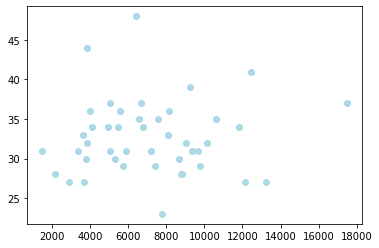

In [53]:
x = merged_density_innovation.pop_density_15[merged_density_innovation['REGION'] == 'EMERGING']
y = merged_density_innovation['Current Score'][merged_density_innovation['REGION'] == 'EMERGING']
fig = plt.figure(111)
ax = fig.add_subplot(111)
ax.scatter(x, y, color='lightblue')
plt.show()


In [68]:
USPTO_patent_dataset = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\USPTO_patent_dataset.csv')

USPTO_patent_dataset_tr = USPTO_patent_dataset.groupby(by=['inventor_city', 'patent_year'], as_index=False).count()



In [97]:
USPTO_patent_dataset_tr.drop(USPTO_patent_dataset_tr.columns[3:7], axis=1, inplace=True)
USPTO_patent_dataset_tr

,inventor_city,patent_year,inventor_country
0,Abbotsford,2005,1
1,Aberdeen,1995,1
2,Adliswil,2014,1
3,Agoura Hills,2015,2
4,Agoura Hills,2017,2
...,...,...,...
1431,Zurich,2014,1
1432,Zurich,2015,4
1433,Zurich,2017,1
1434,Zwolle,2020,1


In [103]:

USPTO_patent_dataset_tr = USPTO_patent_dataset_tr.rename(columns={'inventor_city':'city', 'inventor_country':'no.patents'})
merged_USPTO = pd.merge(USPTO_patent_dataset_tr, density, left_on=['city'], right_on=['City'])

In [104]:
merged_USPTO

,city,patent_year,no.patents,Unnamed: 0,City,Country,boundary_code,area_km2,population_2015,CityCountry,pop_density_15
0,Abbotsford,2005,1,204,Abbotsford,Canada,1,47,112679.2629,AbbotsfordCanada,2397.431126
1,Aberdeen,1995,1,1808,Aberdeen,United Kingdom,1,57,190328.6491,AberdeenUnitedKingdom,3339.099107
2,Albuquerque,1989,1,195,Albuquerque,United States,1,446,685933.7471,AlbuquerqueUnitedStates,1537.968043
3,Albuquerque,2016,2,195,Albuquerque,United States,1,446,685933.7471,AlbuquerqueUnitedStates,1537.968043
4,Albuquerque,2019,2,195,Albuquerque,United States,1,446,685933.7471,AlbuquerqueUnitedStates,1537.968043
...,...,...,...,...,...,...,...,...,...,...,...
509,Zurich,2014,1,2462,Zurich,Switzerland,1,257,732493.4100,ZurichSwitzerland,2850.168911
510,Zurich,2015,4,2462,Zurich,Switzerland,1,257,732493.4100,ZurichSwitzerland,2850.168911
511,Zurich,2017,1,2462,Zurich,Switzerland,1,257,732493.4100,ZurichSwitzerland,2850.168911
512,Zwolle,2020,1,2232,Zwolle,Netherlands,1,36,101499.3490,ZwolleNetherlands,2819.426361


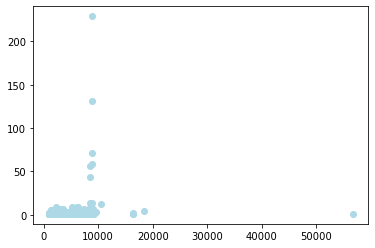

In [114]:
x1 = merged_USPTO.pop_density_15
y1 = merged_USPTO['no.patents']
fig2 = plt.figure(111)
ax1 = fig2.add_subplot(111)
ax1.scatter(x1, y1, color='lightblue')
plt.show()